In [27]:

# Basic Imports 
import numpy as np
import pandas as pd

# Plotting 
from matplotlib import pyplot
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
%matplotlib inline

# Preprocessing
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import LabelEncoder

# Metrics 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import classification_report, accuracy_score, recall_score, roc_auc_score, precision_score
from sklearn.metrics import roc_curve, auc

# ML Models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
import lightgbm as lgb
from lightgbm import LGBMClassifier

# Model Tuning 
from bayes_opt import BayesianOptimization

# Feature Importance 
import shap

# Ignore Warnings 
import warnings

warnings.filterwarnings('ignore')

In [28]:
df = pd.read_pickle("cri_compustat_merged_v6.pkl")

In [29]:
df.head()

,CompNo,year,month,StkIndx,STInt,dtdlevel,dtdtrend,liqnonfinlevel,liqnonfintrend,ni2talevel,...,working_capital_turnover,price_to_earnings,dividend_payout_ratio,retention_ratio,gross_margin_ratio,operating_profit_margin,ebitda_margin,debt_service_coverage_ratio,interest_coverage_ratio,tic
0,42404,2000.0,1,0.089239,0.011089,0.677551,0.332808,1.411466,0.027249,-0.148249,...,0.000000,-5.000000,-0.0,1.0,-5.251700e+06,-2.189250e+07,-2.185540e+07,-149041.103448,-297211.000000,CDSI.2
1,37610,2000.0,1,0.089239,0.011089,0.087376,-0.524732,0.906364,-0.071829,0.000292,...,2.177571,-1.220833,0.0,1.0,2.498284e+01,-7.402171e+01,-6.856532e+01,-0.904380,1.490291,DXPE
2,49536,2000.0,1,0.313050,0.007314,3.693176,0.625516,1.872712,1.010148,-0.069998,...,0.036899,-78.333333,-0.0,1.0,7.542644e+01,-2.309701e+02,-1.503731e+02,-11.081841,-430.222222,ZICA
3,32417,2000.0,1,0.089239,0.011089,6.165654,0.863910,1.275166,0.184606,0.013360,...,0.551135,66.510333,0.0,1.0,5.234158e+01,-2.327468e+01,-1.952816e+01,-395.933333,777.750000,XLTC
4,44933,2000.0,1,0.089239,0.011089,0.629410,-0.874122,0.000000,0.000000,0.004436,...,-2.766467,19.196429,0.0,1.0,7.495250e+01,3.133312e+01,4.316023e+01,0.020216,2.013002,MRYP


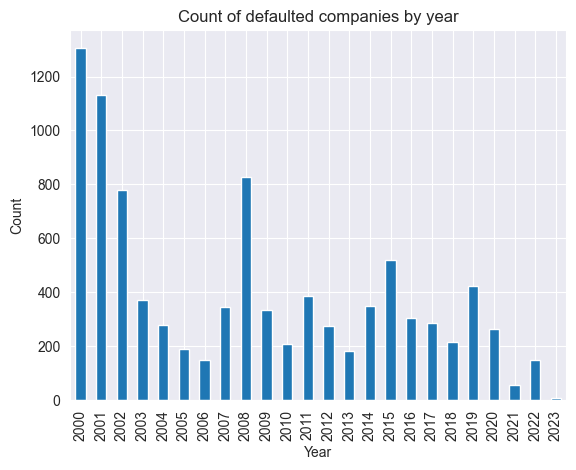

In [30]:
import matplotlib.pyplot as plt
defaults = df[df['Default'] == 1]
counts = defaults['EventDate'].value_counts()
grouped_by_year = counts.groupby(counts.index.year).sum()
grouped_by_year.plot(kind='bar')
plt.title('Count of defaulted companies by year')
plt.xlabel('Year')
plt.ylabel('Count')

# Show the plot
plt.show()

In [31]:
len(defaults)

9322

In [32]:
df.head()

,CompNo,year,month,StkIndx,STInt,dtdlevel,dtdtrend,liqnonfinlevel,liqnonfintrend,ni2talevel,...,working_capital_turnover,price_to_earnings,dividend_payout_ratio,retention_ratio,gross_margin_ratio,operating_profit_margin,ebitda_margin,debt_service_coverage_ratio,interest_coverage_ratio,tic
0,42404,2000.0,1,0.089239,0.011089,0.677551,0.332808,1.411466,0.027249,-0.148249,...,0.000000,-5.000000,-0.0,1.0,-5.251700e+06,-2.189250e+07,-2.185540e+07,-149041.103448,-297211.000000,CDSI.2
1,37610,2000.0,1,0.089239,0.011089,0.087376,-0.524732,0.906364,-0.071829,0.000292,...,2.177571,-1.220833,0.0,1.0,2.498284e+01,-7.402171e+01,-6.856532e+01,-0.904380,1.490291,DXPE
2,49536,2000.0,1,0.313050,0.007314,3.693176,0.625516,1.872712,1.010148,-0.069998,...,0.036899,-78.333333,-0.0,1.0,7.542644e+01,-2.309701e+02,-1.503731e+02,-11.081841,-430.222222,ZICA
3,32417,2000.0,1,0.089239,0.011089,6.165654,0.863910,1.275166,0.184606,0.013360,...,0.551135,66.510333,0.0,1.0,5.234158e+01,-2.327468e+01,-1.952816e+01,-395.933333,777.750000,XLTC
4,44933,2000.0,1,0.089239,0.011089,0.629410,-0.874122,0.000000,0.000000,0.004436,...,-2.766467,19.196429,0.0,1.0,7.495250e+01,3.133312e+01,4.316023e+01,0.020216,2.013002,MRYP


In [33]:
X = df.drop(['CompNo', 'year', 'month', 'StartDate', 'EventDate', 'Duration', 'gvkey','tic', 'Default', 'day', 'date', 'dummy297fin'], axis=1)

In [34]:
X.head()

,StkIndx,STInt,dtdlevel,dtdtrend,liqnonfinlevel,liqnonfintrend,ni2talevel,ni2tatrend,sizelevel,sizetrend,...,day_sales_outstanding,working_capital_turnover,price_to_earnings,dividend_payout_ratio,retention_ratio,gross_margin_ratio,operating_profit_margin,ebitda_margin,debt_service_coverage_ratio,interest_coverage_ratio
0,0.089239,0.011089,0.677551,0.332808,1.411466,0.027249,-0.148249,0.079108,-5.559146,1.222586,...,197946.597222,0.000000,-5.000000,-0.0,1.0,-5.251700e+06,-2.189250e+07,-2.185540e+07,-149041.103448,-297211.000000
1,0.089239,0.011089,0.087376,-0.524732,0.906364,-0.071829,0.000292,0.000139,-2.027446,-0.648054,...,190.722132,2.177571,-1.220833,0.0,1.0,2.498284e+01,-7.402171e+01,-6.856532e+01,-0.904380,1.490291
2,0.313050,0.007314,3.693176,0.625516,1.872712,1.010148,-0.069998,0.038957,1.492078,1.699079,...,0.000000,0.036899,-78.333333,-0.0,1.0,7.542644e+01,-2.309701e+02,-1.503731e+02,-11.081841,-430.222222
3,0.089239,0.011089,6.165654,0.863910,1.275166,0.184606,0.013360,0.000300,0.249383,0.328536,...,269.176235,0.551135,66.510333,0.0,1.0,5.234158e+01,-2.327468e+01,-1.952816e+01,-395.933333,777.750000
4,0.089239,0.011089,0.629410,-0.874122,0.000000,0.000000,0.004436,-0.007812,-2.133248,-0.210920,...,0.000000,-2.766467,19.196429,0.0,1.0,7.495250e+01,3.133312e+01,4.316023e+01,0.020216,2.013002


In [35]:
Y = df['Default']
Y.head()

0    0
1    0
2    0
3    0
4    0
Name: Default, dtype: int64

In [36]:
train_X, test_x, train_y, test_y = train_test_split(X, Y, test_size=0.2 , random_state = 0, shuffle= True,stratify = Y)

train_X, valid_X, train_y, valid_y  = train_test_split(train_X, train_y, test_size=0.2, random_state = 0, shuffle= True,stratify = train_y)

In [37]:
train_X.shape

(754824, 40)

In [38]:
LogReg = LogisticRegression(random_state=0).fit(train_X, train_y)
XGBClass = xgb.XGBClassifier(eval_metric  = "logloss", max_depth=5, learning_rate=0.01, n_estimators=100, gamma=0, 
                        min_child_weight=1, subsample=0.8, colsample_bytree=0.8, reg_alpha=0.005,seed = 0).fit(train_X,train_y)
RFClass = RandomForestClassifier(n_estimators = 50, max_depth = 50,n_jobs = -1, random_state = 0).fit(train_X,train_y)
LGBMClass = LGBMClassifier(random_state=0).fit(train_X, train_y)

[LightGBM] [Info] Number of positive: 5966, number of negative: 748858
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007736 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 10182
[LightGBM] [Info] Number of data points in the train set: 754824, number of used features: 40
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.007904 -> initscore=-4.832473
[LightGBM] [Info] Start training from score -4.832473


In [39]:
pred_y = LogReg.predict(valid_X)
print("                    Logistic Regression")
print(classification_report(valid_y,pred_y,digits=3))

pred_y = XGBClass.predict(valid_X)
print("                    XGBoost Classifier")
print(classification_report(valid_y,pred_y,digits=3))

pred_y = RFClass.predict(valid_X)
print("                    Random Forest Classifier")
print(classification_report(valid_y,pred_y,digits=3))

pred_y = LGBMClass.predict(valid_X)
print("                    LightGBM Classifier")
print(classification_report(valid_y,pred_y,digits=3))

                    Logistic Regression
              precision    recall  f1-score   support

           0      0.993     0.943     0.967    187215
           1      0.022     0.163     0.039      1492

    accuracy                          0.937    188707
   macro avg      0.508     0.553     0.503    188707
weighted avg      0.985     0.937     0.960    188707

                    XGBoost Classifier
              precision    recall  f1-score   support

           0      0.992     1.000     0.996    187215
           1      0.000     0.000     0.000      1492

    accuracy                          0.992    188707
   macro avg      0.496     0.500     0.498    188707
weighted avg      0.984     0.992     0.988    188707

                    Random Forest Classifier
              precision    recall  f1-score   support

           0      0.995     1.000     0.997    187215
           1      0.972     0.322     0.483      1492

    accuracy                          0.995    188707
   m

In [40]:
pred_y = LogReg.predict(valid_X)
print("                    Logistic Regression")
print(f"AUC ROC: {roc_auc_score(valid_y, pred_y)}")
print(confusion_matrix(valid_y,pred_y))

pred_y = XGBClass.predict(valid_X)
print("                    XGBoost Classifier")
print(f"AUC ROC: {roc_auc_score(valid_y, pred_y)}")
print(confusion_matrix(valid_y,pred_y))

pred_y = RFClass.predict(valid_X)
print("                    Random Forest Classifier")
print(f"AUC ROC: {roc_auc_score(valid_y, pred_y)}")
print(confusion_matrix(valid_y,pred_y))

pred_y = LGBMClass.predict(valid_X)
print("                    LightGBM Classifier")
print(f"AUC ROC: {roc_auc_score(valid_y, pred_y)}")
print(confusion_matrix(valid_y,pred_y))

                    Logistic Regression
AUC ROC: 0.5530391557097083
[[176583  10632]
 [  1249    243]]
                    XGBoost Classifier
AUC ROC: 0.5
[[187215      0]
 [  1492      0]]
                    Random Forest Classifier
AUC ROC: 0.6608205186807987
[[187201     14]
 [  1012    480]]
                    LightGBM Classifier
AUC ROC: 0.5981313705858821
[[186691    524]
 [  1195    297]]


In [41]:
len(valid_y)

188707

In [42]:
def search_best_param(X,y):
    
    trainXY = lgb.Dataset(data=X, label=y,free_raw_data=False)
    # define the lightGBM cross validation
    def lightGBM_CV(max_depth, num_leaves, n_estimators, learning_rate, subsample, colsample_bytree, 
                lambda_l1, lambda_l2, min_child_weight):
    
        params = {'boosting_type': 'gbdt', 'objective': 'binary', 'metric':'auc', 'verbose': -1,
                  'early_stopping_round':100}
        
        params['max_depth'] = int(round(max_depth))
        params["num_leaves"] = int(round(num_leaves))
        params["n_estimators"] = int(round(n_estimators))
        params['learning_rate'] = learning_rate
        params['subsample'] = subsample
        params['colsample_bytree'] = colsample_bytree
        params['lambda_l1'] = max(lambda_l1, 0)
        params['lambda_l2'] = max(lambda_l2, 0)
        params['min_child_weight'] = min_child_weight
    
        score = lgb.cv(params, trainXY, nfold=5, seed=1, stratified=True, metrics=['auc'])
        return np.mean(score['valid auc-mean']) # maximize auc-mean

    # use bayesian optimization to search for the best hyper-parameter combination
    lightGBM_Bo = BayesianOptimization(lightGBM_CV, 
                                       {
                                          'max_depth': (5, 50),
                                          'num_leaves': (20, 100),
                                          'n_estimators': (50, 500),
                                          'learning_rate': (0.01, 0.3),
                                          'subsample': (0.7, 0.8),
                                          'colsample_bytree' :(0.5, 0.99),
                                          'lambda_l1': (0, 5),
                                          'lambda_l2': (0, 3),
                                          'min_child_weight': (2, 50) 
                                      },
                                       random_state = 1,
                                       verbose = 3
                                      )
    np.random.seed(1)
    
    lightGBM_Bo.maximize(init_points= 5, n_iter=5) # 5 + 5, 10 iterations 
    # n_iter: How many steps of bayesian optimization you want to perform. The more steps the more likely to find a good maximum you are.
    # init_points: How many steps of random exploration you want to perform. Random exploration can help by diversifying the exploration space.
    # more iterations more time spent searching 
    
    params_set = lightGBM_Bo.max['params']
    
    # get the params of the maximum target     
    max_target = -np.inf
    for i in lightGBM_Bo.res: 
        if i['target'] > max_target:
            params_set = i['params']
            max_target = i['target']
    
    params_set.update({'verbose': -1})
    params_set.update({'metric': 'auc'})
    params_set.update({'boosting_type': 'gbdt'})
    params_set.update({'objective': 'binary'})
    
    params_set['max_depth'] = int(round(params_set['max_depth']))
    params_set['num_leaves'] = int(round(params_set['num_leaves']))
    params_set['n_estimators'] = int(round(params_set['n_estimators']))
    params_set['seed'] = 1 #set seed
    
    return params_set
best_params = search_best_param(train_X,train_y)

|   iter    |  target   | colsam... | lambda_l1 | lambda_l2 | learni... | max_depth | min_ch... | n_esti... | num_le... | subsample |
-------------------------------------------------------------------------------------------------------------------------------------
| 1         | 0.9698    | 0.7043    | 3.602     | 0.0003431 | 0.09768   | 11.6      | 6.432     | 133.8     | 47.64     | 0.7397    |
| 2         | 0.9783    | 0.764     | 2.096     | 2.056     | 0.06929   | 44.52     | 3.315     | 351.7     | 53.38     | 0.7559    |
| 3         | 0.9861    | 0.5688    | 0.9905    | 2.402     | 0.2908    | 19.1      | 35.23     | 444.4     | 91.57     | 0.7085    |
| 4         | 0.9683    | 0.5191    | 0.8492    | 2.634     | 0.03852   | 23.95     | 47.98     | 289.9     | 75.35     | 0.7316    |
| 5         | 0.9788    | 0.8364    | 4.173     | 0.05486   | 0.2275    | 49.5      | 37.91     | 176.2     | 83.14     | 0.7103    |
| 6         | 0.9852    | 0.5959    | 4.536     | 0.6795    | 

In [43]:
# Train lgbm_best using the best params found from Bayesian Optimization
train_lgbdata=lgb.Dataset(train_X,label=train_y,free_raw_data=False)
test_lgbdata=lgb.Dataset(valid_X,label=valid_y,free_raw_data=False)
lgbm_best = lgb.train(best_params,
                 train_lgbdata,
                 num_boost_round = 100,
                 valid_sets = test_lgbdata,
                 )

<Axes: title={'center': 'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

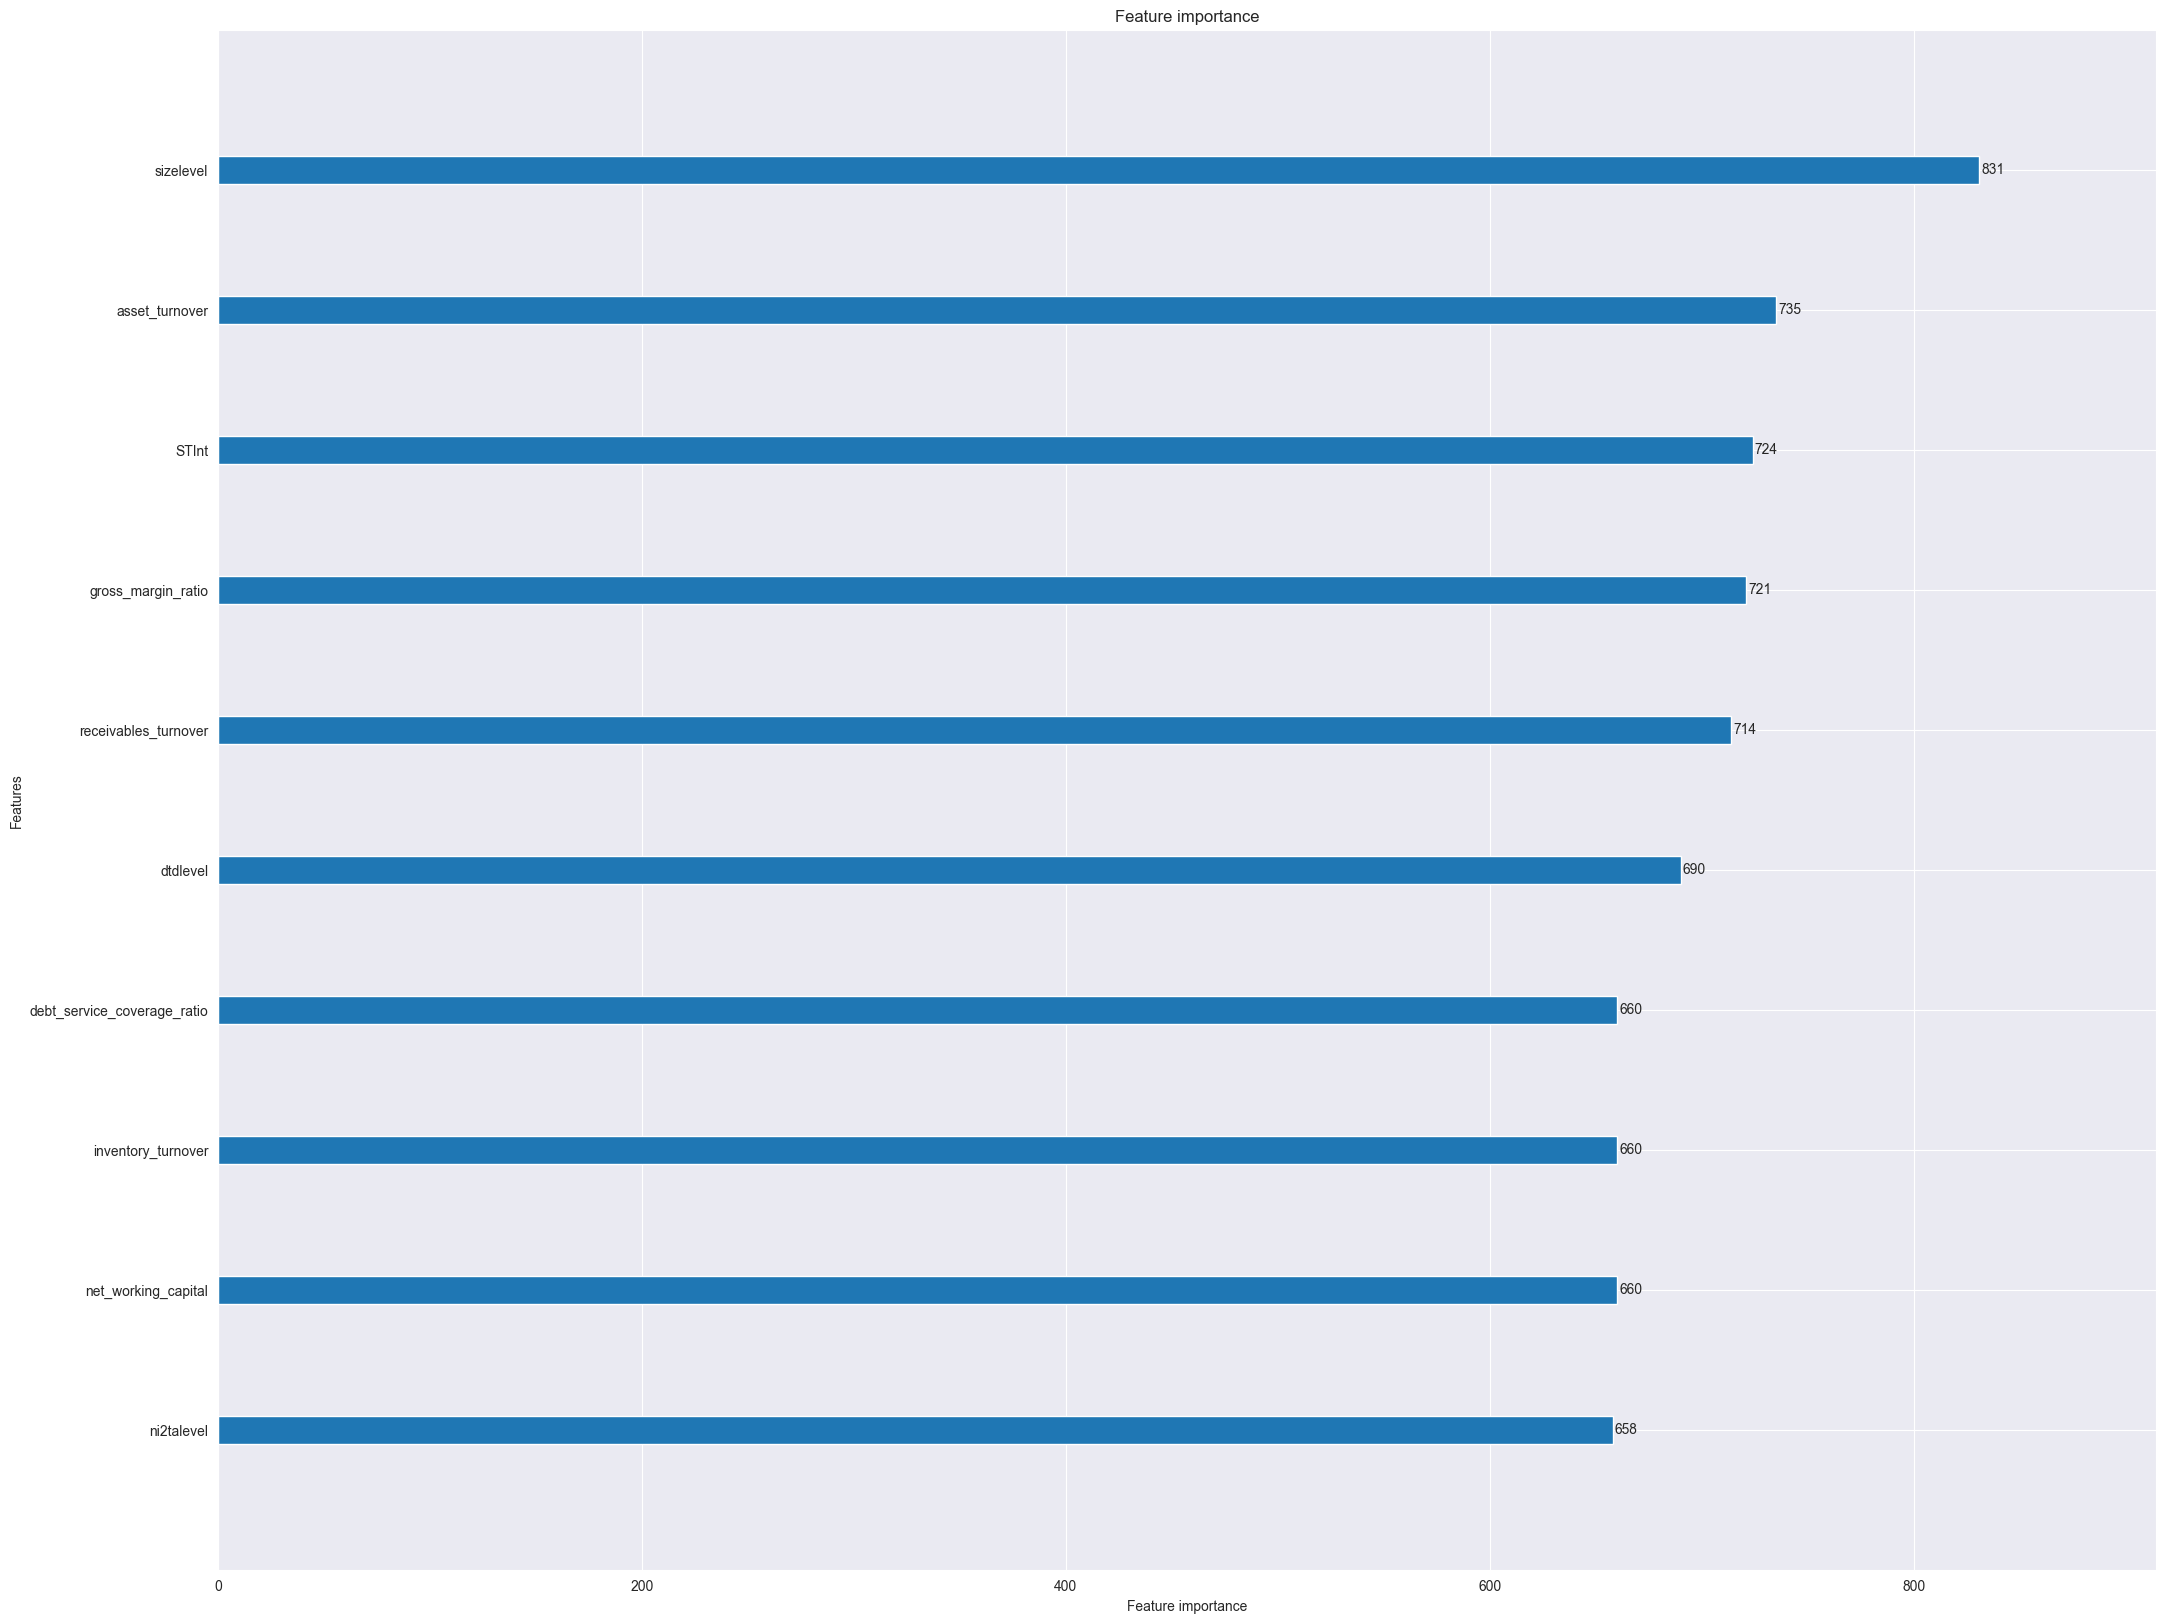

In [44]:
##% Feature Importance 
# https://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html
lgb.plot_importance(lgbm_best,figsize=(25,20),max_num_features = 10)

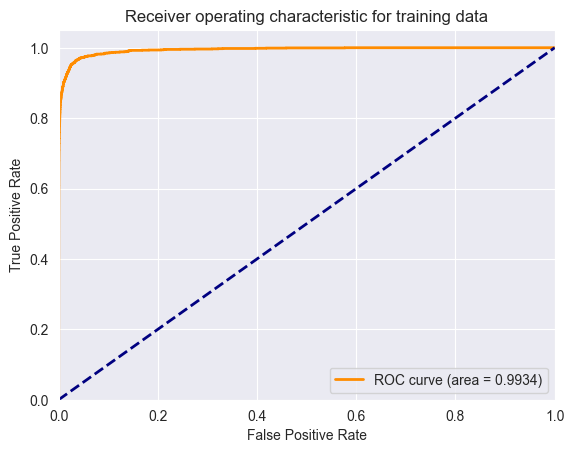

In [45]:
# https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html#sphx-glr-auto-examples-model-selection-plot-roc-py
# from sklearn.metrics import roc_curve, auc

y_probas = lgbm_best.predict(test_x)

fpr, tpr, _ = roc_curve(test_y, y_probas)
roc_auc = auc(fpr, tpr)

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.4f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for training data')
plt.legend(loc="lower right")
plt.show()

Best Threshold=0.004965, G-Mean=0.965


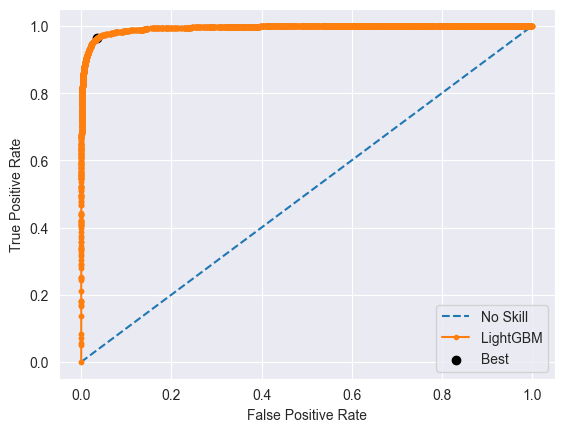

In [46]:
# https://machinelearningmastery.com/threshold-moving-for-imbalanced-classification/
pred_y = lgbm_best.predict(test_x)
# calculate roc curves
fpr, tpr, thresholds = roc_curve(test_y, pred_y)
# calculate the g-mean for each threshold
gmeans = np.sqrt(tpr * (1 - fpr))
# locate the index of the largest g-mean
ix = np.argmax(gmeans)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))
# plot the roc curve for the model
pyplot.figure(num=0, figsize=[6.4, 4.8])
pyplot.plot([0, 1], [0, 1], linestyle='--', label='No Skill')
pyplot.plot(fpr, tpr, marker='.', label='LightGBM')
pyplot.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
# show the plot
pyplot.show()

In [47]:
# Great Function found on Kaggle for plotting a Confusion Matrix
# https://www.kaggle.com/grfiv4/plot-a-confusion-matrix
def plot_confusion_matrix_kaggle(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    """
    given a sklearn confusion matrix (cm), make a nice plot

    Arguments
    ---------
    cm:           confusion matrix from sklearn.metrics.confusion_matrix

    target_names: given classification classes such as [0, 1, 2]
                  the class names, for example: ['high', 'medium', 'low']

    title:        the text to display at the top of the matrix

    cmap:         the gradient of the values displayed from matplotlib.pyplot.cm
                  see http://matplotlib.org/examples/color/colormaps_reference.html
                  plt.get_cmap('jet') or plt.cm.Blues

    normalize:    If False, plot the raw numbers
                  If True, plot the proportions

    Usage
    -----
    plot_confusion_matrix(cm           = cm,                  # confusion matrix created by
                                                              # sklearn.metrics.confusion_matrix
                          normalize    = True,                # show proportions
                          target_names = y_labels_vals,       # list of names of the classes
                          title        = best_estimator_name) # title of graph

    Citiation
    ---------
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    """
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()
    
# binarize an array based of a threshold 
def binarizeArray(array,threshold = 0.5):
    return [0 if num < threshold else 1 for num in array]

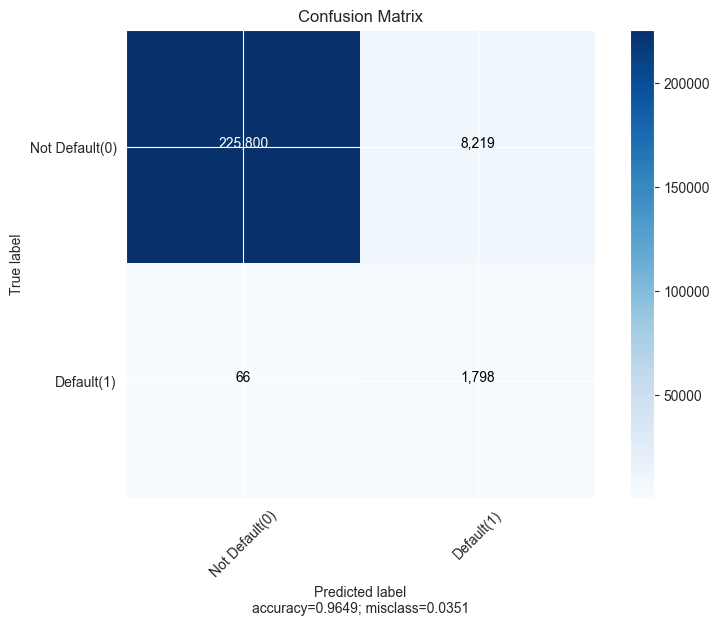

              precision    recall  f1-score   support

           0       1.00      0.96      0.98    234019
           1       0.18      0.96      0.30      1864

    accuracy                           0.96    235883
   macro avg       0.59      0.96      0.64    235883
weighted avg       0.99      0.96      0.98    235883

Accuracy: 96.49%
Recall: 96.46%


In [48]:
pref_y_bin = binarizeArray(pred_y, thresholds[ix])
cm = confusion_matrix(test_y, pref_y_bin)
plot_confusion_matrix_kaggle(cm=cm,
                             normalize=False,
                             target_names=['Not Default(0)', 'Default(1)'],
                             title="Confusion Matrix")
print(classification_report(test_y, pref_y_bin))
print("Accuracy: %.2f%%" % (accuracy_score(test_y, pref_y_bin) * 100.0))
print("Recall: %.2f%%" % ((recall_score(test_y, pref_y_bin)) * 100.0))

In [49]:
pred_y = lgbm_best.predict(test_x)
print("                    LightGBM Classifier")
print(f"AUC ROC: {roc_auc_score(test_y, pred_y)}")

                    LightGBM Classifier
AUC ROC: 0.9934376499674187
